# Intro to ipywidgets

This notebook focuses on the `interact` function from the ipywidgets module. 

Note: Ipywidgets relies on javascript, and it can be a pain to get it working in Internet Explorer. I've had good experiences in Chrome, but this is pretty brittle (e.g. be careful about versions, paths, etc..)

### Default Behaviour  

When you have a function `foo` with some keyword arguments, the `interact(foo)` will have some interesting default behaviour depending on they types of the default values for the keyword arguments of your function `foo`.

By default:
- It will take any argument that has a default value of `True` or `False`, and make it into a toggle. 
- It will take any argument that has a default value of a list and make it a drop-down menu
- It will turn any tuple into a integer slider (or a floating point slider if a 3 element tuple is given).

This is best clarified with a few examples:

In [13]:
from ipywidgets import interact

In [14]:
# This does nothing

def foo():
    print(f'Nothing to see here')
    
interact(foo)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.foo()>

In [15]:
# Because x has a boolean default value, a toggle is created

def foo(x=False):
    print(f'x is {x}')
    
interact(foo)

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.foo(x=False)>

In [16]:
# Beacause y is a list, a drop-down menue is created

def foo(x=False, y=['a','b','c']):
    print(f'x is {x}, y is {y}')
    
interact(foo)

interactive(children=(Checkbox(value=False, description='x'), Dropdown(description='y', options=('a', 'b', 'c'…

<function __main__.foo(x=False, y=['a', 'b', 'c'])>

In [17]:
# Here, z is a tuple with a starting point and and end point, resulting in an integer slider
# w is also a slider, but it has the additional 'step' argument, here set to 0.1

def foo(x=False, y=['a','b','c'], z=(0,5), w=(0,5,0.1)):
    print(f'x is {x}, y is {y}, z is {z}, w is {w}')
    
_ = interact(foo)

interactive(children=(Checkbox(value=False, description='x'), Dropdown(description='y', options=('a', 'b', 'c'…

Using this for an ever-so-slightly useful tool:

In [26]:
def bmi(weight=(0,100,0.5), height=(0.5, 2.10, 0.01), gender=['M','F']):
    '''This function computes the BMI of a person
    
    - weight is in (Kg)
    - height is in (m)
    
    Have fun!!!'''
    
    
    bmi = weight/height
    
    if gender=='M':
        print(f'His BMI is {round(bmi, 1)}')
    else:
        print(f'Her BMI is {round(bmi, 1)}')
        
interact(bmi)

interactive(children=(FloatSlider(value=50.0, description='weight', step=0.5), FloatSlider(value=1.3, descript…

<function __main__.bmi(weight=(0, 100, 0.5), height=(0.5, 2.1, 0.01), gender=['M', 'F'])>

# A better way to do it

Perhaps you felt some pain at seeing a function that should take in floats have default value set to tuples. In fact, if we try to run `bmi` outside of `interact` we will suffer our shortcuts.

In [28]:
bmi()

TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'

A better way of doing things is to define `bmi` as one should, and set the interactivity as part of they keyword arguments passed to `interact`

In [29]:
def bmi(weight=70, height=1.75, gender='M'):
    bmi = weight/height
    
    if gender=='M':
        print(f'His BMI is {round(bmi, 1)}')
    else:
        print(f'Her BMI is {round(bmi, 1)}')
        

In [30]:
interact(bmi, weight=(0,100,0.5), height=(0.5, 2.10, 0.01), gender=['M','F'])

interactive(children=(FloatSlider(value=70.0, description='weight', step=0.5), FloatSlider(value=1.75, descrip…

<function __main__.bmi(weight=70, height=1.75, gender='M')>

In the end we obtain the same result, but we've decoupled our function from the syntax shortcuts of the ipywidgets module.

# Being more specific

If one wants to play outside the defaults it is useful to import a few more classes and define our things explicitly.

For now, lets just mess with a few randomly plotted dots.

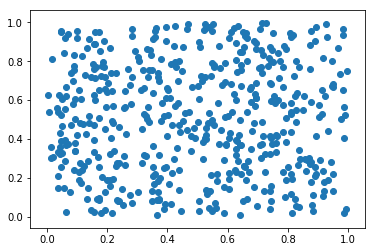

In [78]:
import numpy as np
import matplotlib.pyplot as plt

random_data_x = np.random.rand(500)
random_data_y = np.random.rand(500)

plt.scatter(random_data_x, random_data_y)

In [80]:
# For reference, this is how we did it in the previous section:

def plot(xmin=0, xmax=1, ymin=0, ymax=1):

    # This will plot all the points in gray
    plt.scatter(random_data_x, random_data_y)
    
    within_values = (xmin < random_data_x) & (random_data_x < xmax) & (ymin < random_data_y) & (random_data_y < ymax)

    plt.scatter(random_data_x[within_values], random_data_y[within_values], color='r')

    
interact(plot, xmin=(0,1,0.1), xmax=(0,1,0.1), ymin=(0,1,0.1), ymax=(0,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='xmin', max=1.0), FloatSlider(value=1.0, description=…

<function __main__.plot(xmin=0, xmax=1, ymin=0, ymax=1)>

Next, lets see how we can use the FloatSlider class to be a bit more explicit



In [81]:
from ipywidgets import FloatSlider

slider = FloatSlider(min=0, max=1, step=0.1)

display(slider)

FloatSlider(value=0.0, max=1.0)

In [82]:
interact(plot, xmin=FloatSlider(min=0, max=1, step=0.1), 
               xmax=FloatSlider(min=0, max=1, step=0.1), 
               ymin=FloatSlider(min=0, max=1, step=0.1), 
               ymax=FloatSlider(min=0, max=1, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='xmin', max=1.0), FloatSlider(value=0.0, description=…

<function __main__.plot(xmin=0, xmax=1, ymin=0, ymax=1)>

One small advantage is that we can set the default value and label for each slider quite easily.

In [83]:
interact(plot, xmin=FloatSlider(min=0, max=1, step=0.1, value=0.1, description='Minimum x value'), 
               xmax=FloatSlider(min=0, max=1, step=0.1, value=0.4, description='Maximum x value'), 
               ymin=FloatSlider(min=0, max=1, step=0.1, value=0.7, description='Minimum y value'), 
               ymax=FloatSlider(min=0, max=1, step=0.1, value=0.9, description='Maximum y value'))

interactive(children=(FloatSlider(value=0.1, description='Minimum x value', max=1.0), FloatSlider(value=0.4, d…

<function __main__.plot(xmin=0, xmax=1, ymin=0, ymax=1)>

However, the true value of this independent classes is that you can move beyond the default interactive tools

In [87]:
from ipywidgets import FloatRangeSlider


def plot2(xrange, yrange):

    xmin, xmax = xrange
    ymin, ymax = yrange
    
    plot(xmin, xmax, ymin, ymax)
    

In [88]:
interact(plot2, xrange=FloatRangeSlider(min=0, max=1, step=0.1, value=(0.1, 0.5), description='Range of x'), 
               yrange=FloatRangeSlider(min=0, max=1, step=0.1, value=(0.1, 0.5), description='Range of x'))


interactive(children=(FloatRangeSlider(value=(0.1, 0.5), description='Range of x', max=1.0), FloatRangeSlider(…

<function __main__.plot2(xrange, yrange)>

### Exercise 

Use interact to change the **slope** and **y-intercept** of a line

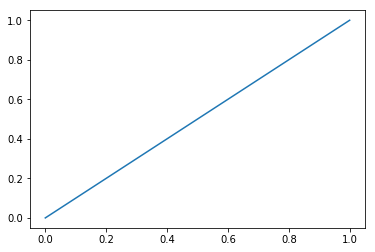

In [90]:
# Hint:

x1, x2 = 0, 1
y1, y2 = 0, 1

plt.plot([x1,x2], [y1+0, y2+0])